In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

from sklearn.datasets._samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA


## 1. k-means Clustering on simulated data

#### Generate simulated dataset

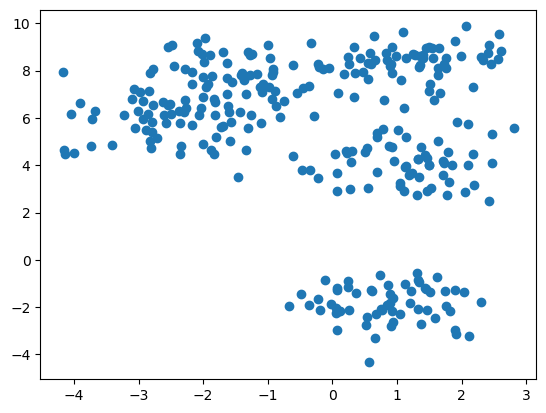

In [5]:
# set number of clusters
n_clusters = 5
cluster_sd = 0.8

# make fake data
X, y = make_blobs(n_samples=300, n_features=3, centers=n_clusters, cluster_std=cluster_sd, random_state=0)
plt.scatter(X[:,0], X[:,1])

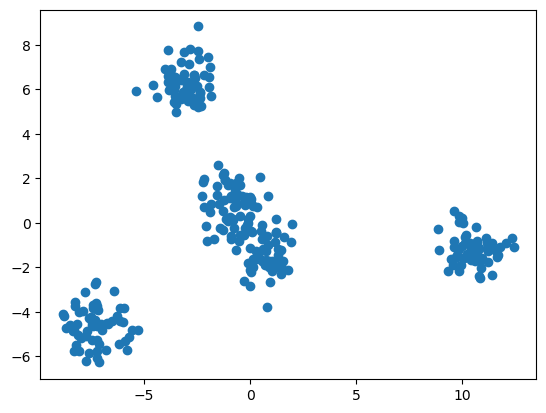

In [8]:
# PCA to reduce dimension
X_reduced = PCA(n_components=2).fit_transform(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1])

/var/folders/d5/0rs5hy6j79776c7g000ncxbm0000gn/T/ipykernel_6124/2580452706.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X[:,0], X[:,1], X[:,2],cmap="plasma")


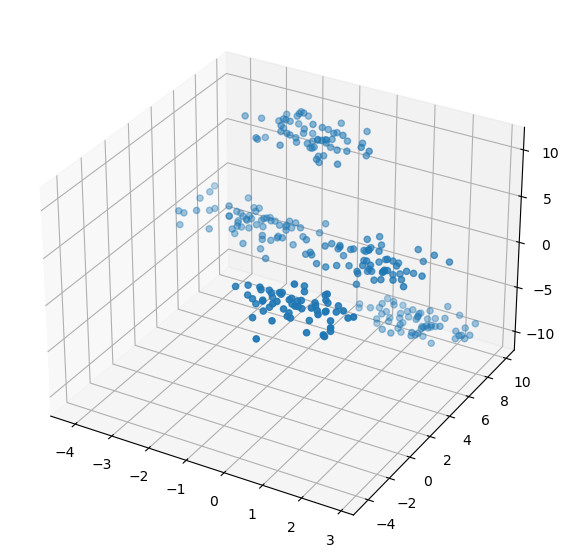

In [21]:
# 3d plot
fig = plt.figure(figsize=(10,7))
ax= plt.axes(projection ='3d')

ax.scatter3D(X[:,0], X[:,1], X[:,2])

In [17]:
# scale feature 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Set up k-means

ARI = 1.0


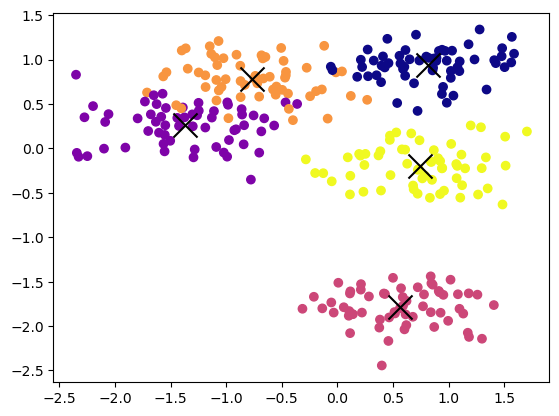

In [18]:
# use k-means to cluster

# set up params
k = 5
n_iter = 100
init_rounds = 10

# run clustering
kmeans = KMeans(n_clusters=k, init='k-means++', 
                max_iter=n_iter, n_init=init_rounds, random_state=0)

# predict clusters using trained k-means
pred_y = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=pred_y, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='x')

# check k-means performance for this dataset
print("ARI =", adjusted_rand_score(y, pred_y))

[ARI](https://mk-hasan.github.io/posts/2020/04/blog-post-4/) - Adjusted Rand Index(ARI) is one of the widely used metrics for validating clustering performance

ARI = 0.6057952066341691


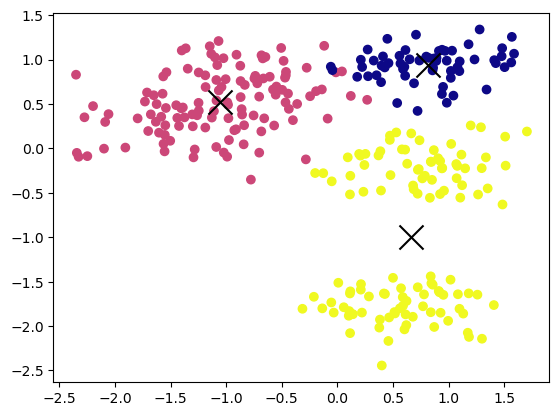

In [19]:
# try clustering for fewer clusters

# set up params
k = 3
n_iter = 100
init_rounds = 10

# run clustering
kmeans = KMeans(n_clusters=k, init='k-means++', 
                max_iter=n_iter, n_init=init_rounds, random_state=0)

# predict clusters using trained k-means
pred_y = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=pred_y, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='x')

print("ARI =", adjusted_rand_score(y, pred_y))

#### Check performance if we change k

ARI = 0.921048627668858


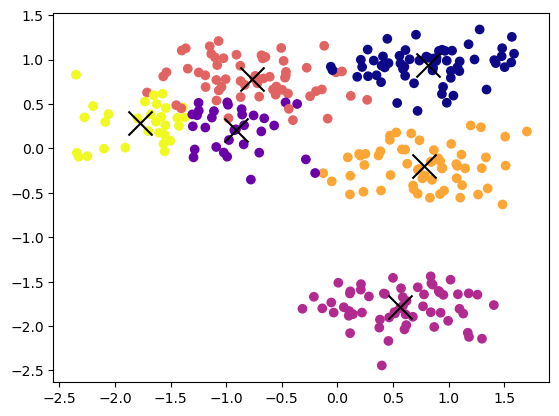

In [20]:
# try cluter into more clusters

k = 6
n_iter = 100
init_rounds = 10

# run clustering
kmeans = KMeans(n_clusters=k, init='k-means++', 
                max_iter=n_iter, n_init=init_rounds, random_state=0)

# predict clusters using trained k-means
pred_y = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=pred_y, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='x')

print("ARI =", adjusted_rand_score(y, pred_y))

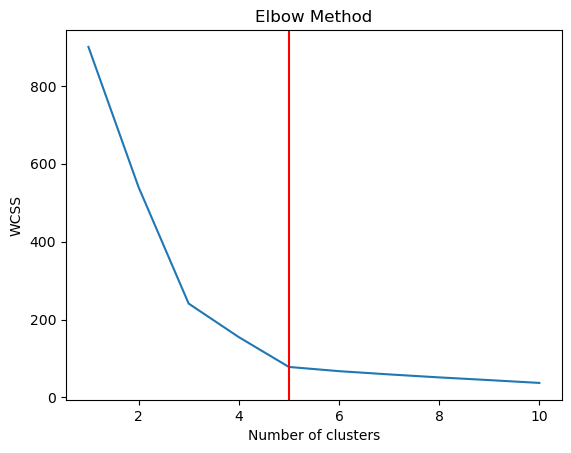

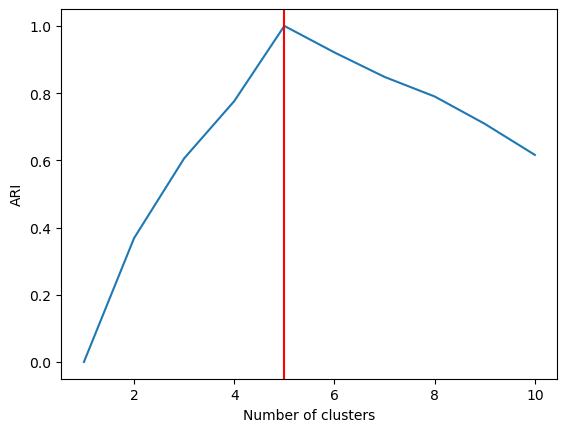

In [22]:
# try to identify best k

# compute and plot within-cluster sum of squares
wcss = []
ARI = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_pred = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    ARI.append(adjusted_rand_score(y, y_pred))
    
# plot WCSS for different k
plt.plot(range(1, 11), wcss)
plt.axvline(x=5, c='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# plot ARI for different k
plt.plot(range(1, 11), ARI)
plt.axvline(ARI.index(max(ARI))+1, c='red')
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()

Because we are using a simulated dataset, we have "labels" to calculate ARI. For a real clustering problem, we won't have labels, and ARI won't be a relavent metric.

WCSS will always be available for clustering regardless of label. 

[K-means](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a) comprehesive explaination

## 2. DBSCAN Clustering on simulated data

#### Set up DBSCAN

ARI = 0.016470397864222032


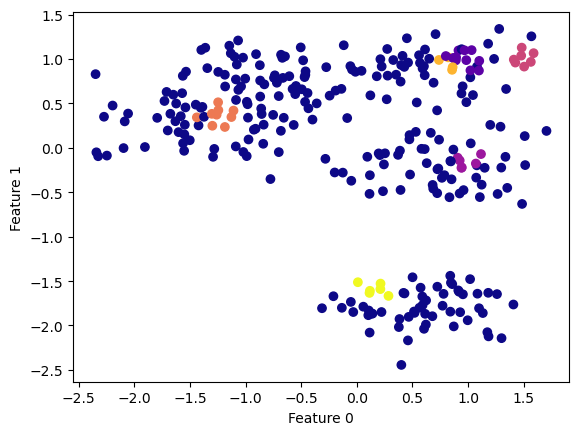

In [23]:
# cluster the data into five clusters
eps = 0.15
min_sample = 5
dbscan = DBSCAN(eps=eps, min_samples=min_sample)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("ARI =", adjusted_rand_score(y, clusters))

#### Check how parameter change leads to performance change

ARI = 0.8783668019532338


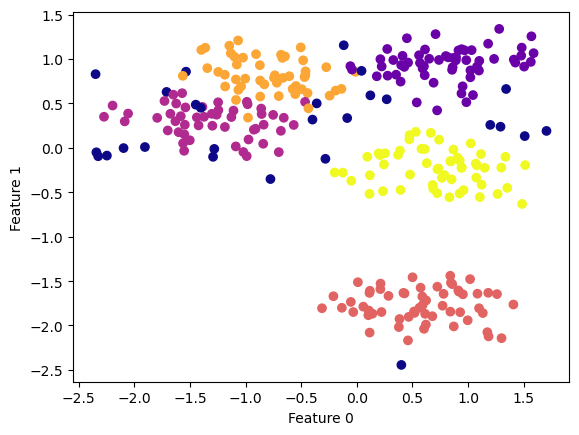

In [24]:
# indcrease eps-distance 
eps = 0.3
min_sample = 5
dbscan = DBSCAN(eps=eps, min_samples=min_sample)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("ARI =", adjusted_rand_score(y, clusters))

ARI = 0.0


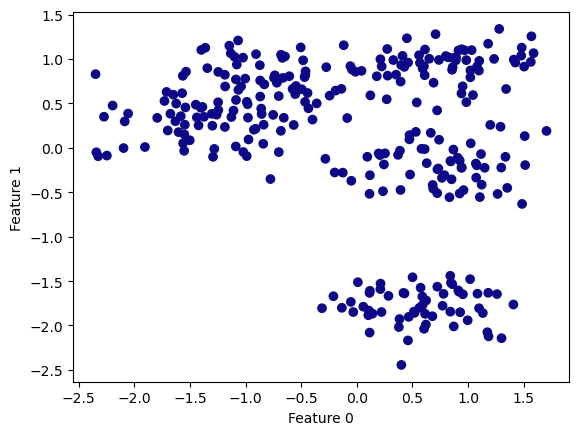

In [25]:
# increase density
eps = 0.15
min_sample = 10
dbscan = DBSCAN(eps=eps, min_samples=min_sample)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("ARI =", adjusted_rand_score(y, clusters))

#### Parameter tuning examples using ARI as optimized metric

In [26]:
# try to use performance to tune parameter
for eps in np.arange(0.1, 0.2, 0.01):
    for min_sample in range(3,10):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        clusters = dbscan.fit_predict(X_scaled)

        print("eps=",eps,"min_sample=",min_sample,"ARI =", adjusted_rand_score(y, clusters))

eps= 0.1 min_sample= 3 ARI = 0.0019839198624276026
eps= 0.1 min_sample= 4 ARI = 0.0009316823056196539
eps= 0.1 min_sample= 5 ARI = 0.0
eps= 0.1 min_sample= 6 ARI = 0.0
eps= 0.1 min_sample= 7 ARI = 0.0
eps= 0.1 min_sample= 8 ARI = 0.0
eps= 0.1 min_sample= 9 ARI = 0.0
eps= 0.11 min_sample= 3 ARI = 0.005359108240549698
eps= 0.11 min_sample= 4 ARI = 0.0009316823056196539
eps= 0.11 min_sample= 5 ARI = 0.0
eps= 0.11 min_sample= 6 ARI = 0.0
eps= 0.11 min_sample= 7 ARI = 0.0
eps= 0.11 min_sample= 8 ARI = 0.0
eps= 0.11 min_sample= 9 ARI = 0.0
eps= 0.12 min_sample= 3 ARI = 0.010165777010966695
eps= 0.12 min_sample= 4 ARI = 0.004389772114185053
eps= 0.12 min_sample= 5 ARI = 0.0009145448353223889
eps= 0.12 min_sample= 6 ARI = 0.0
eps= 0.12 min_sample= 7 ARI = 0.0
eps= 0.12 min_sample= 8 ARI = 0.0
eps= 0.12 min_sample= 9 ARI = 0.0
eps= 0.13 min_sample= 3 ARI = 0.019139141643777127
eps= 0.13 min_sample= 4 ARI = 0.005565405181828017
eps= 0.13 min_sample= 5 ARI = 0.0013786875583788013
eps= 0.13 min_sa

ARI = 0.9027144031703107


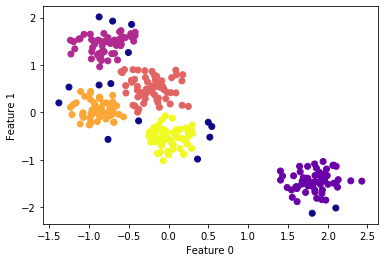

In [12]:
# use the best params combination
eps = 0.17
min_sample = 3
dbscan = DBSCAN(eps=eps, min_samples=min_sample)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("ARI =", adjusted_rand_score(y, clusters))

#### Parameter tuning using distance
Here we used part of KNN algrithm and ideas to help select DBSCAN parameters if we do not have true cluster label 

[KNN](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761) explained

In [28]:
#import sys
#!{sys.executable} -m pip install kneed

Text(0, 0.5, 'Distance')

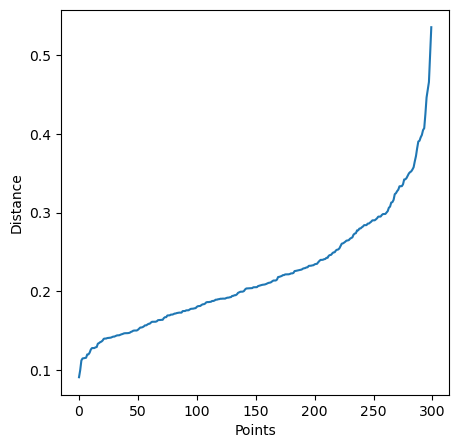

In [33]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator # need to install package kneed

# calculate distance for min_samples
nearest_neighbors = NearestNeighbors(n_neighbors=4)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)
distances = np.sort(distances[:,3], axis=0)

# plot it out
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

optimal eps: 0.29701031816214746


<Figure size 500x500 with 0 Axes>

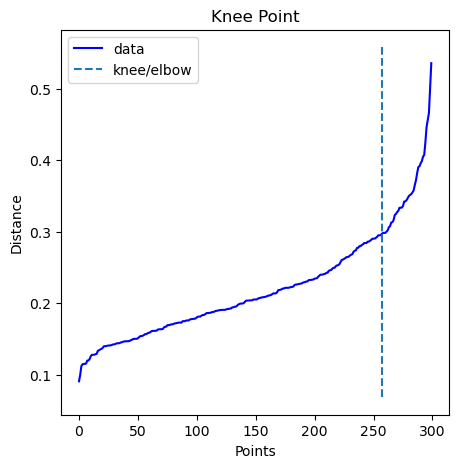

In [32]:
# find the "knee" in the distance plot
# how to interpret this plot???

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee(figsize=(5, 5))
plt.xlabel("Points")
plt.ylabel("Distance")

print("optimal eps:",distances[knee.knee])

In [35]:
distances[knee.knee]

0.15646872662489691

ARI = 0.9116621375030478


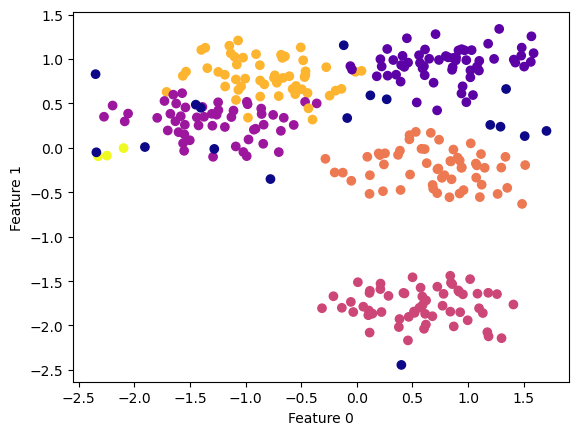

In [34]:
# use the best params combination
eps = distances[knee.knee]
min_sample = 3
dbscan = DBSCAN(eps=eps, min_samples=min_sample)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("ARI =", adjusted_rand_score(y, clusters))

4 types of [distance](https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/)

## 3. Dim reduction using PCA

#### Get toy dataset

In [35]:
# set up dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [36]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
# Separating out the features
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
n_samples = x.shape[0]

#### Set up PCA and look at eigenvalues
Since original dataset only has 4 features, we will try reducing dimension to 3.

In [44]:
principalDf

,pc_1,pc_2,pc_3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428
...,...,...,...
145,1.870522,0.382822,0.254532
146,1.558492,-0.905314,-0.025382
147,1.520845,0.266795,0.179277
148,1.376391,1.016362,0.931405


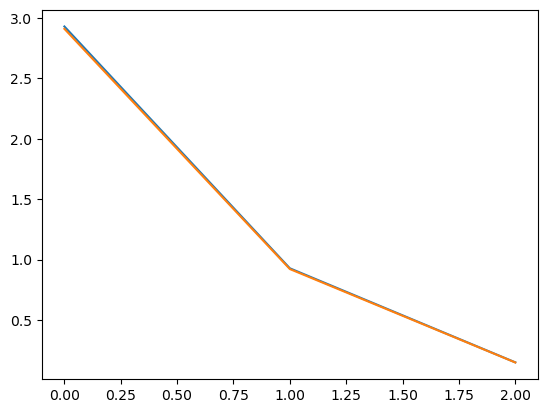

In [43]:
# set up PCA 
n_pc = 3
pca = PCA(n_components=n_pc)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc_'+str(i+1) for i in range(n_pc)])

# calculate eigenvalues
# method 1
eigenvalues = pca.explained_variance_
plt.plot(eigenvalues)

# method 2
cov_matrix = np.dot(x.T, x) / n_samples
eigenvalues_2 = []
for eigenvector in pca.components_:    
    eigenvalues_2.append(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
plt.plot(eigenvalues_2)

# method 1 and 2 should give similar/same results

#### Look at variance explained

Text(0.5, 1.0, 'Incremental variance explained by PC')

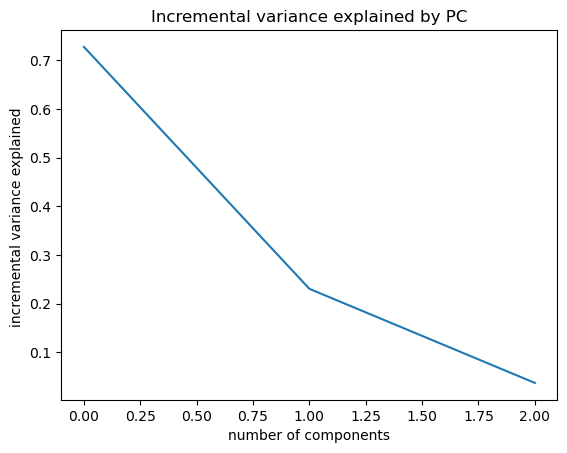

In [45]:
# plot incremental variance explained

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('incremental variance explained ')
plt.title('Incremental variance explained by PC')

Text(0.5, 1.0, 'Cumulative variance explained by PC')

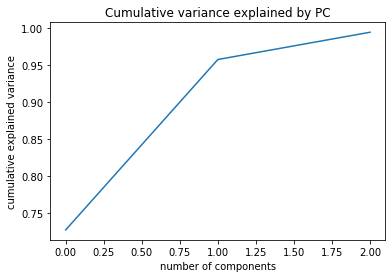

In [21]:
# plot cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative variance explained by PC')

#### Visualize data on different PCs

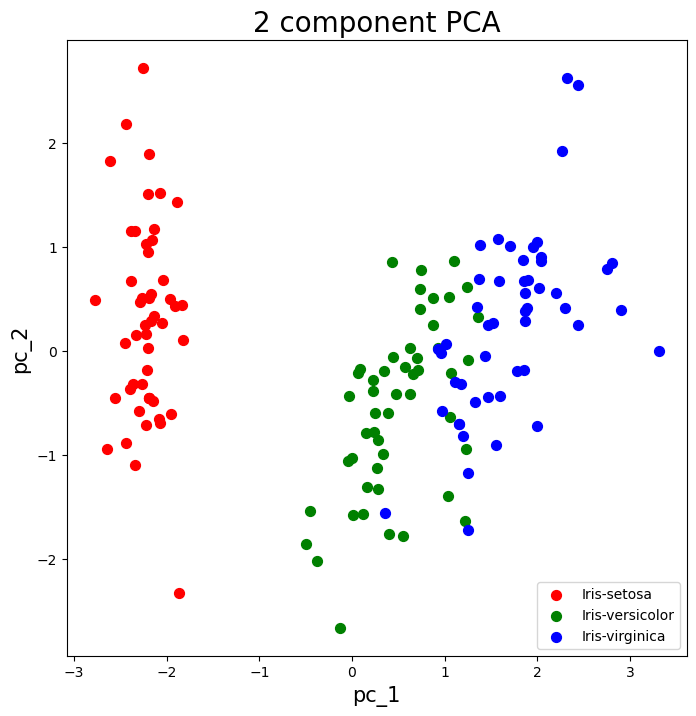

In [46]:
# visualize data on PC1 and PC2

# add in PCs to dataframe
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc_1', fontsize = 15)
ax.set_ylabel('pc_2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc_1']
               , finalDf.loc[indicesToKeep, 'pc_2']
               , c = color
               , s = 50)
ax.legend(targets)

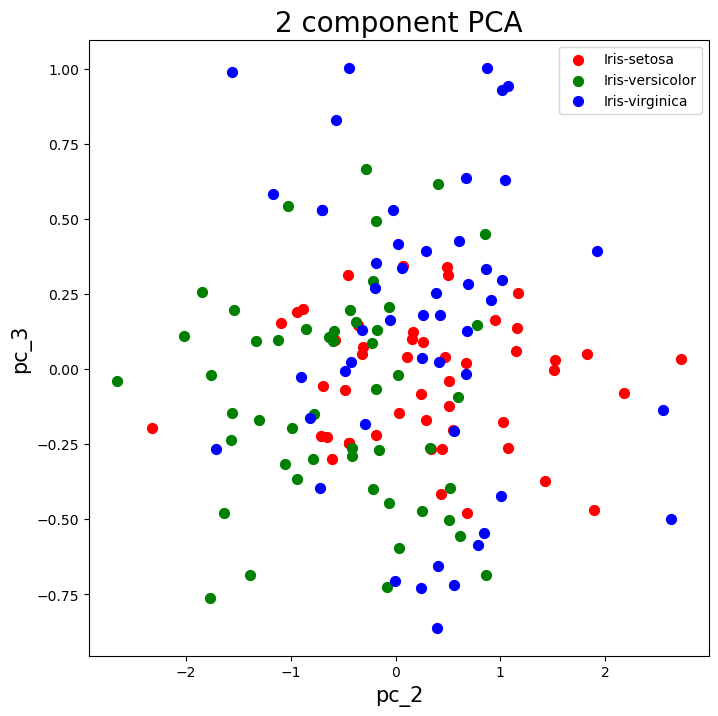

In [47]:
# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc_2', fontsize = 15)
ax.set_ylabel('pc_3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc_2']
               , finalDf.loc[indicesToKeep, 'pc_3']
               , c = color
               , s = 50)
ax.legend(targets)

From the two figures above, we can tell PC1 and PC2 preserved variation in original dataset. 

For PC2 and PC3, we see very little pattern from the plot.

## 4. Using PCA to speed up modeling
Example: hand-written digits classification using MNIST dataset

For this type of PCA use, the product/solution focused on prediction without demanding of variable explaination

In [48]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# fetch data
mnist = fetch_openml('mnist_784')

/Users/dby/opt/anaconda3/envs/itmds2023/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [49]:
# train-test split
# test_size: what proportion of original data is used for test set

test_size = 0.2
random_state = 123

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, 
                                                            test_size=test_size, random_state=random_state)

In [50]:
# check original dimension
train_img.shape, test_img.shape

((56000, 784), (14000, 784))

In [58]:
# standardize inputs
scaler = StandardScaler()

# Fit on training set only
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [59]:
# Make an instance of the PCA, and use training data to fit

n_components = 0.95
# by definition of documentation, n_components between 0 and 1 means variance preserved

# If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select the
#     number of components such that the amount of variance that needs to be
#     explained is greater than the percentage specified by n_components.

pca = PCA(n_components)
lower_dimensional_train = pca.fit_transform(train_img)

In [60]:
# check dimension
lower_dimensional_train.shape
# we have reduced dimension by more than 50% but still preserved 95% or variation

(56000, 327)

Text(0.5, 1.0, 'Cumulative variance explained by PC')

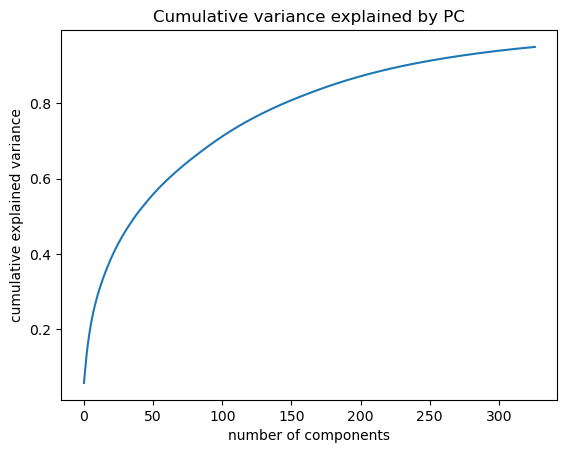

In [61]:
# plot cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative variance explained by PC')

### Visualizing lower dimenson data

In [110]:
# to visualize in origin format, we will need to do two back transformation
# PCA -> original dimension
# standardized -> original scale

# first back transformation from PCs to original dim is done here
approximation = pca.inverse_transform(lower_dimensional_train)

# Original Image
example_id = 1

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# back transform standardized data to original scale 
plt.imshow(scaler.inverse_transform(train_img[example_id]).reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20)

# 327 principal components
plt.subplot(1, 2, 2)
# back transform standardized data to original scale 
plt.imshow(scaler.inverse_transform(approximation[example_id]).reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('{} components'.format(pca.n_components_), fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20)

ValueError: non-broadcastable output operand with shape (784,1) doesn't match the broadcast shape (784,784)

### Use PCA components to fit model

In [63]:
from sklearn.linear_model import LogisticRegression
# you can also use statsmodels 

In [64]:
# apply PCA transformation to train and test dataset
train_img_lowdim = pca.transform(train_img)
test_img_lowdim = pca.transform(test_img)

In [65]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'

logisticRegr = LogisticRegression(solver = 'lbfgs')

In [107]:
# EXERCISE: please complete the code below to build and assess model

# it might be easier if you wrap this part in a function to be called repeatedly


def PCA_log(train_img, test_img, train_lbl, test_lbl) :
    # transformed PCA components
    train_img_lowdim = pca.transform(train_img)
    test_img_lowdim = pca.transform(test_img)
        
        
    # use the transformed PCA components to fit logistic regression models
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    logisticRegr.fit(train_img_lowdim, train_lbl)
    
    print('intercept ', logisticRegr.intercept_[0])
    print('classes', logisticRegr.classes_)  
    
    
    # use fitted model to predict test data labels
    train_pred = logisticRegr.predict(train_img_lowdim) # predict use training data
    test_pred = logisticRegr.predict(test_img_lowdim) # predict use test data 
    
    
    # use some metric to measure model classification performance on test dataset
    from dmba import classificationSummary
    from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
    from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
    print(classificationSummary(test_lbl, test_pred, class_names=logisticRegr.classes_)) # target test vs predicted 
    
    print(pd.DataFrame(precision_recall_fscore_support(test_lbl, test_pred),index=['precision', 'recall', 'fbeta_score', 'support'])) # return  precision, recall, fbeta_score, support

In [108]:
PCA_log(train_img, test_img, train_lbl, test_lbl)
# might be helpful to include AUC and ROC graphs

intercept  -1.868318235526537
classes ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Confusion Matrix (Accuracy 0.9214)

       Prediction
Actual    0    1    2    3    4    5    6    7    8    9
     0 1311    1    3    4    1    8   17    1    5    3
     1    0 1566   12    7    2    6    3    3   22    4
     2   12   18 1227   17   23    3   16   18   36    7
     3    7    7   30 1272    2   41    3   16   31   13
     4    1    6   13    1 1316    0    9    4   12   29
     5   18    5   12   32   18 1132   21    8   31    8
     6    6    5    7    0   16   10 1273    0    7    0
     7    5    7   15    5   18    3    0 1306    3   47
     8   13   28   14   38   10   46    9    6 1244   28
     9    5    7    1   17   31    7    0   48    8 1253
None
                       0            1            2            3            4  \
precision       0.951379     0.949091     0.919790     0.913137     0.915797   
recall          0.968242     0.963692     0.891068     0.894515     0.9460

/Users/dby/opt/anaconda3/envs/itmds2023/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Homework problem 2: Can you explore how the data visualization and logistic regression model performance change with different number of PC in PCA? Change # of PC for a few values and compare model performance.

Comprehend [hand-written digits classification](https://github.com/NupurShukla/Handwritten-Digit-Recognition)

Test PC = 50, 200, 400, 600.

PC = 400 has highest accuracy 0.9218. More PC do not mean higher performance (at least from accuracy perspective)

In [141]:
train_img.shape

(56000, 784)

In [150]:

def PCA_log2(train_img, test_img, train_lbl, test_lbl, n_pc) :
    # transformed PCA components
    pca = PCA(n_components=n_pc)
    PC_lower_dimensional_train = pca.fit_transform(train_img)
    principalDf = pd.DataFrame(data = PC_lower_dimensional_train
             , columns = ['pc_'+str(i+1) for i in range(n_pc)])
    # calculate eigenvalues
    eigenvalues = pca.explained_variance_
    plt.title(f'PC = {n_pc}')
    plt.plot(eigenvalues)
    
    
    train_img_lowdim = pca.transform(train_img)
    test_img_lowdim = pca.transform(test_img)

    
    # use the transformed PCA components to fit logistic regression models
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    logisticRegr.fit(train_img_lowdim, train_lbl)
    
    print('intercept ', logisticRegr.intercept_[0])
    print('classes', logisticRegr.classes_)  
    
    
    # use fitted model to predict test data labels
    train_pred = logisticRegr.predict(train_img_lowdim) # predict use training data
    test_pred = logisticRegr.predict(test_img_lowdim) # predict use test data 
    
    
    # use some metric to measure model classification performance on test dataset
    from dmba import classificationSummary
    from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
    from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
    print(classificationSummary(test_lbl, test_pred, class_names=logisticRegr.classes_)) # target test vs predicted 
    
    print(pd.DataFrame(precision_recall_fscore_support(test_lbl, test_pred),index=['precision', 'recall', 'fbeta_score', 'support'])) # return  precision, recall, fbeta_score, support

/Users/dby/opt/anaconda3/envs/itmds2023/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


intercept  -1.8495423989206143
classes ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Confusion Matrix (Accuracy 0.9199)

       Prediction
Actual    0    1    2    3    4    5    6    7    8    9
     0 1316    0    3    5    1    7   13    1    3    5
     1    0 1560   10    9    2    9    4    4   21    6
     2   14   16 1229   17   27    3   13   16   36    6
     3    6   10   32 1273    4   37    3   13   25   19
     4    1    5   14    3 1314    1    8    4   11   30
     5   17    4   12   38   24 1117   21    6   35   11
     6    7    5    8    2   17   11 1267    1    6    0
     7    7   12   15    3   16    1    0 1301    4   50
     8   12   25   18   36    7   45    8    4 1254   27
     9    4    8    1   13   41    7    0   46    9 1248
None
                       0            1            2            3            4  \
precision       0.950867     0.948328     0.915797     0.909936     0.904336   
recall          0.971935     0.960000     0.892520     0.895218     0.944

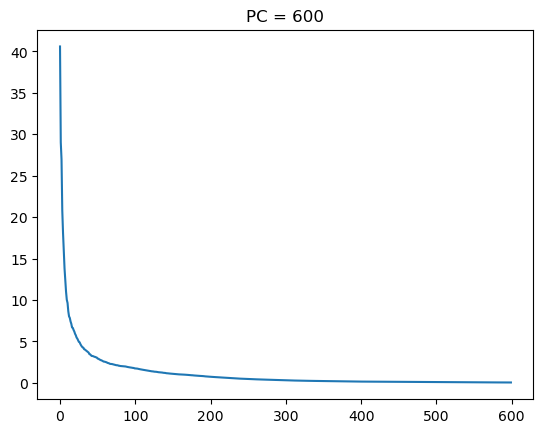

In [151]:
PCA_log2(train_img, test_img, train_lbl, test_lbl, 600) 

/Users/dby/opt/anaconda3/envs/itmds2023/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


intercept  -1.6827004367667817
classes ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Confusion Matrix (Accuracy 0.9218)

       Prediction
Actual    0    1    2    3    4    5    6    7    8    9
     0 1316    1    3    4    2    7   13    0    4    4
     1    0 1561   10   10    2    9    3    4   22    4
     2   13   21 1227   16   26    2   16   17   35    4
     3    8   11   27 1277    2   40    3   15   25   14
     4    1    4   14    1 1313    0    9    5   10   34
     5   17    6    9   34   19 1134   20    7   30    9
     6    5    6    7    1   16   11 1271    1    6    0
     7    7    9   11    4   17    1    0 1306    3   51
     8   14   25   16   37   10   44   10    3 1250   27
     9    5    7    1   16   32    8    0   49    9 1250
None
                       0            1            2            3            4  \
precision       0.949495     0.945488     0.926038     0.912143     0.912439   
recall          0.971935     0.960615     0.891068     0.898031     0.943

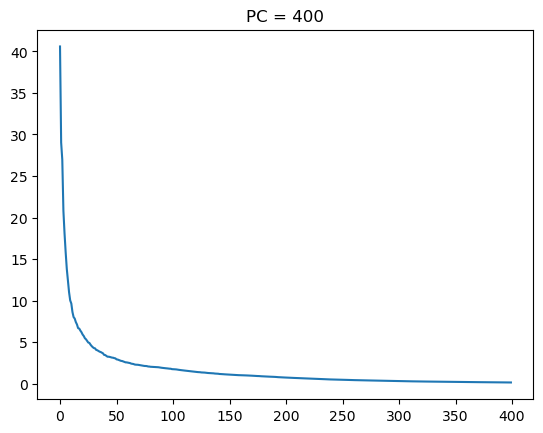

In [152]:
PCA_log2(train_img, test_img, train_lbl, test_lbl, 400) 

/Users/dby/opt/anaconda3/envs/itmds2023/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


intercept  -1.5871817963033497
classes ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Confusion Matrix (Accuracy 0.9186)

       Prediction
Actual    0    1    2    3    4    5    6    7    8    9
     0 1303    0    8    5    1   11   18    0    4    4
     1    0 1567   11    8    1    7    2    4   21    4
     2   10   13 1216   17   23    5   19   20   46    8
     3    9    8   28 1269    2   49    2   15   23   17
     4    1    4   13    1 1306    1   12    4   10   39
     5   22    5    9   36   18 1123   18    8   37    9
     6   10    5    6    0   12    7 1274    1    9    0
     7    5   11   15    5   16    2    0 1298    2   55
     8   14   27   14   35    7   48    9    4 1253   25
     9    6    6    1   17   35    6    0   45   10 1251
None
                       0            1            2            3            4  \
precision       0.944203     0.952005     0.920515     0.910983     0.919071   
recall          0.962334     0.964308     0.883079     0.892405     0.938

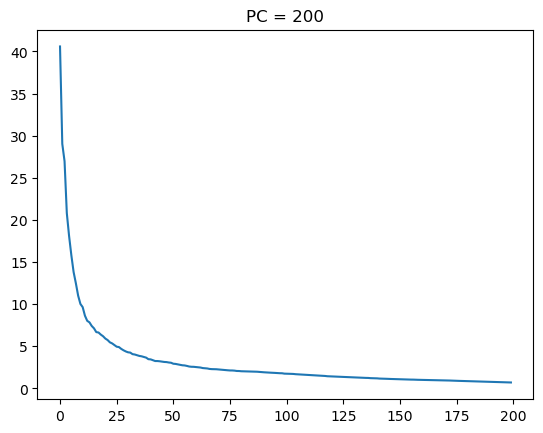

In [153]:
PCA_log2(train_img, test_img, train_lbl, test_lbl, 200) 

/Users/dby/opt/anaconda3/envs/itmds2023/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


intercept  -1.2184846128742242
classes ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Confusion Matrix (Accuracy 0.9005)

       Prediction
Actual    0    1    2    3    4    5    6    7    8    9
     0 1286    0    8    7    2   20   17    1   10    3
     1    0 1563   10    9    1    7    4    3   26    2
     2   12   16 1204   20   24    7   24   17   50    3
     3    7    7   36 1243    1   52    5   19   34   18
     4    2    5   10    1 1290    4   12    7    9   51
     5   14    9   12   51   21 1081   23    7   57   10
     6    4    3    7    3   10   13 1269    2   12    1
     7    8   17   22    8   23    2    0 1276    0   53
     8   15   30   21   56    8   66    9    3 1200   28
     9   14   10    2   16   56    5    1   69    9 1195
None
                       0            1            2            3            4  \
precision       0.944200     0.941566     0.903904     0.879066     0.898329   
recall          0.949778     0.961846     0.874365     0.874121     0.927

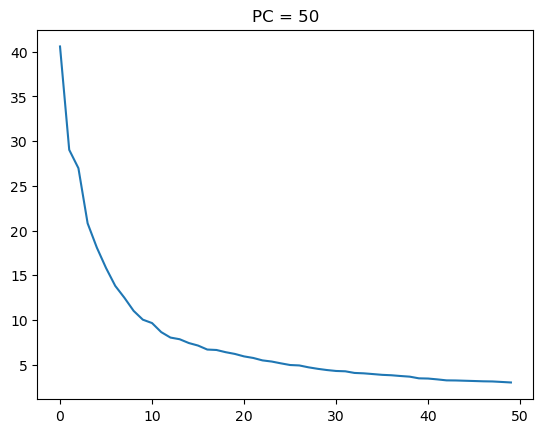

In [154]:
PCA_log2(train_img, test_img, train_lbl, test_lbl, 50) 